In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [68]:
chall_df = pd.read_csv('Data/Challenger_Ranked_Games.csv')
gm_df = pd.read_csv('Data/GrandMaster_Ranked_Games.csv')
m_df = pd.read_csv('Data/Master_Ranked_Games.csv')

In [69]:
chall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [70]:
m_df.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150


In [189]:
m_df_blue = m_df.iloc[:,2:26]
m_df_red = m_df.iloc[:,26:]

In [190]:
m_df_blue.info()
m_df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   blueWins                 107125 non-null  int64  
 1   blueFirstBlood           107125 non-null  int64  
 2   blueFirstTower           107125 non-null  int64  
 3   blueFirstBaron           107125 non-null  int64  
 4   blueFirstDragon          107125 non-null  int64  
 5   blueFirstInhibitor       107125 non-null  int64  
 6   blueDragonKills          107125 non-null  int64  
 7   blueBaronKills           107125 non-null  int64  
 8   blueTowerKills           107125 non-null  int64  
 9   blueInhibitorKills       107125 non-null  int64  
 10  blueWardPlaced           107125 non-null  int64  
 11  blueWardkills            107125 non-null  int64  
 12  blueKills                107125 non-null  int64  
 13  blueDeath                107125 non-null  int64  
 14  blue

In [191]:
m_df_blue.corr()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
blueWins,1.000000,0.208979,0.472211,0.369585,0.276402,0.668425,0.455406,0.355497,0.723008,0.583411,...,0.328040,0.153082,0.248268,0.067803,0.192247,0.192247,0.201437,0.387202,0.192846,0.527904
blueFirstBlood,0.208979,1.000000,0.220634,0.050738,0.142845,0.157705,0.136477,0.043951,0.190511,0.124774,...,0.084498,0.041193,0.078277,0.039860,0.051018,0.051018,0.056709,0.121124,0.034819,0.144270
blueFirstTower,0.472211,0.220634,1.000000,0.145523,0.224847,0.397007,0.298754,0.124413,0.496109,0.323699,...,0.164791,0.115336,0.198912,0.118411,0.153919,0.153919,0.192193,0.255915,0.102505,0.386796
blueFirstBaron,0.369585,0.050738,0.145523,1.000000,0.132850,0.410164,0.441767,0.886130,0.528847,0.414582,...,0.231409,0.312299,0.423081,0.401575,0.385228,0.385228,0.484125,0.270866,0.380609,0.651391
blueFirstDragon,0.276402,0.142845,0.224847,0.132850,1.000000,0.186230,0.586899,0.123915,0.300609,0.141852,...,-0.045051,0.002572,0.080543,0.190257,0.044485,0.044485,0.268259,0.058621,0.088643,0.356591
blueFirstInhibitor,0.668425,0.157705,0.397007,0.410164,0.186230,1.000000,0.405637,0.385164,0.782831,0.785919,...,0.389297,0.297246,0.376793,0.156892,0.321487,0.321487,0.260849,0.415279,0.284947,0.557738
blueDragonKills,0.455406,0.136477,0.298754,0.441767,0.586899,0.405637,1.000000,0.474558,0.623088,0.405868,...,0.179914,0.329062,0.456738,0.553720,0.389783,0.389783,0.670585,0.288019,0.451725,0.802850
blueBaronKills,0.355497,0.043951,0.124413,0.886130,0.123915,0.385164,0.474558,1.000000,0.540374,0.454216,...,0.271325,0.396292,0.500591,0.470616,0.446875,0.446875,0.546634,0.302245,0.469332,0.715454
blueTowerKills,0.723008,0.190511,0.496109,0.528847,0.300609,0.782831,0.623088,0.540374,1.000000,0.780148,...,0.363262,0.414968,0.559752,0.445335,0.465059,0.465059,0.546419,0.473354,0.446814,0.823877
blueInhibitorKills,0.583411,0.124774,0.323699,0.414582,0.141852,0.785919,0.405868,0.454216,0.780148,1.000000,...,0.467621,0.453039,0.508025,0.210576,0.436088,0.436088,0.282899,0.496463,0.391103,0.581210


In [181]:
m_df_red.corr()

,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
redWins,1.000000,0.209282,0.471455,0.396186,0.281737,0.655057,0.470271,0.381315,0.728810,0.578057,...,0.332346,0.173848,0.275944,0.109334,0.221730,0.221730,0.247116,0.397022,0.220708,0.557780
redFirstBlood,0.209282,1.000000,0.221325,0.055745,0.143543,0.157353,0.137645,0.050123,0.191544,0.129137,...,0.093045,0.049901,0.089735,0.046416,0.067637,0.067637,0.063948,0.133657,0.041991,0.149507
redFirstTower,0.471455,0.221325,1.000000,0.139931,0.218930,0.387465,0.273799,0.115574,0.474712,0.322710,...,0.171968,0.114934,0.191292,0.088955,0.152229,0.152229,0.165999,0.265146,0.090783,0.358227
redFirstBaron,0.396186,0.055745,0.139931,1.000000,0.164575,0.424891,0.478562,0.878913,0.551792,0.420620,...,0.240586,0.319876,0.436378,0.423805,0.399478,0.399478,0.507313,0.280960,0.392133,0.672978
redFirstDragon,0.281737,0.143543,0.218930,0.164575,1.000000,0.181271,0.602207,0.152402,0.310868,0.132150,...,-0.056650,0.004068,0.093746,0.251900,0.060856,0.060856,0.330749,0.050572,0.105384,0.383447
redFirstInhibitor,0.655057,0.157353,0.387465,0.424891,0.181271,1.000000,0.398818,0.396883,0.778417,0.783726,...,0.391698,0.309457,0.390088,0.171756,0.338380,0.338380,0.272713,0.422950,0.295399,0.562035
redDragonKills,0.470271,0.137645,0.273799,0.478562,0.602207,0.398818,1.000000,0.513207,0.632133,0.398732,...,0.181884,0.336974,0.472321,0.596538,0.408786,0.408786,0.710578,0.292832,0.463035,0.819190
redBaronKills,0.381315,0.050123,0.115574,0.878913,0.152402,0.396883,0.513207,1.000000,0.565124,0.465714,...,0.284693,0.411875,0.521806,0.500545,0.466808,0.466808,0.575070,0.313948,0.486266,0.740140
redTowerKills,0.728810,0.191544,0.474712,0.551792,0.310868,0.778417,0.632133,0.565124,1.000000,0.780838,...,0.372067,0.428829,0.577115,0.467473,0.486870,0.486870,0.567984,0.482336,0.460820,0.834565
redInhibitorKills,0.578057,0.129137,0.322710,0.420620,0.132150,0.783726,0.398732,0.465714,0.780838,1.000000,...,0.469853,0.463652,0.520218,0.228514,0.450267,0.450267,0.299055,0.501849,0.402095,0.589352


In [73]:
vision_df = m_df[['gameId','gameDuraton','blueWins','redWins','blueWardPlaced','redWardPlaced']]

In [74]:
vision_df_blue_wins = vision_df[vision_df['blueWins']> 0]
vision_df_blue_losses = vision_df[vision_df['blueWins'] == 0]

In [75]:
vision_df_blue_wins.reset_index(inplace=True)
vision_df_blue_losses.reset_index(inplace=True)

In [76]:
vision_df_blue_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53041 entries, 0 to 53040
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   index           53041 non-null  int64
 1   gameId          53041 non-null  int64
 2   gameDuraton     53041 non-null  int64
 3   blueWins        53041 non-null  int64
 4   redWins         53041 non-null  int64
 5   blueWardPlaced  53041 non-null  int64
 6   redWardPlaced   53041 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB


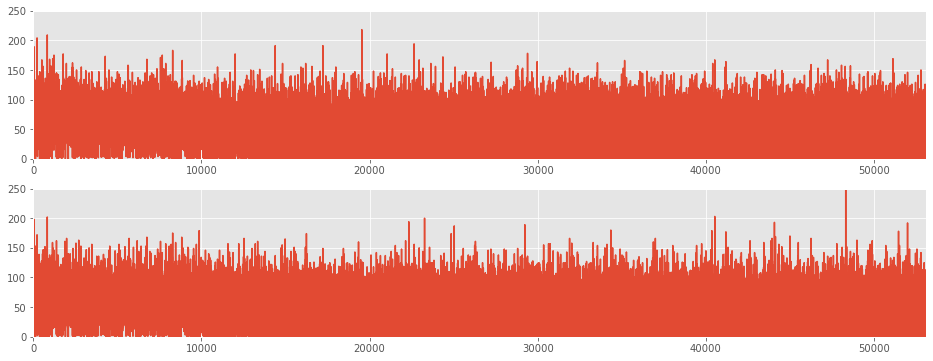

In [77]:
x = np.linspace(0, 5000, num = 1000)

fig, axs = plt.subplots(2, figsize = (16,6))
axs[0].plot(vision_df_blue_wins[['blueWardPlaced']])
axs[0].set_xlim(0, 53100)
axs[0].set_ylim(0,250)


axs[1].plot(vision_df_blue_wins[['redWardPlaced']])
axs[1].set_xlim(0, 53100)
axs[1].set_ylim(0,250)

plt.show();

In [78]:
p_value = stats.mannwhitneyu(vision_df_blue_wins[['blueWardPlaced']],vision_df_blue_wins[['redWardPlaced']], alternative="greater")

In [79]:
p_value

MannwhitneyuResult(statistic=1483605127.5, pvalue=5.001379862078499e-54)

In [80]:
from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from glm.glm import GLM
from glm.families import Gaussian

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [81]:
model = sm.OLS(vision_df_blue_wins[['blueWins']],vision_df_blue_wins[['blueWardPlaced']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               blueWins   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                          1.724e+05
Date:                Mon, 26 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:16:14   Log-Likelihood:                         -36883.
No. Observations:               53041   AIC:                                  7.377e+04
Df Residuals:                   53040   BIC:                                  7.378e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [82]:
x = vision_df_blue_wins[['blueWardPlaced','redWardPlaced','gameDuraton']]
# x = x[0:1000]

In [83]:
y = vision_df_blue_wins['blueWins']
# y = y[0:1000]

In [84]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               blueWins   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          2.484e+05
Date:                Mon, 26 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:16:14   Log-Likelihood:                         -3355.6
No. Observations:               53041   AIC:                                      6717.
Df Residuals:                   53038   BIC:                                      6744.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [85]:
y_predict = results.predict(x)
y_predict

0        0.964464
1        0.622236
2        0.635041
3        1.086155
4        0.924009
           ...   
53036    1.317018
53037    1.138370
53038    0.996554
53039    1.418470
53040    0.758077
Length: 53041, dtype: float64

In [86]:
residuals = y_predict - y

In [87]:
residuals

0       -0.035536
1       -0.377764
2       -0.364959
3        0.086155
4       -0.075991
           ...   
53036    0.317018
53037    0.138370
53038   -0.003446
53039    0.418470
53040   -0.241923
Length: 53041, dtype: float64

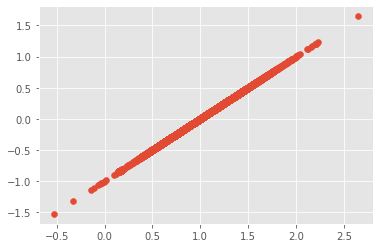

In [88]:
plt.scatter(y_predict,residuals);

In [89]:
new_df = m_df[m_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

In [90]:
# x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','redWardkills','redWardPlaced','gameDuraton','blueKills','redKills']].values)
x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','gameDuraton','blueKills']].values)
# x = x[0:1000]

In [91]:
y = new_df['blueTotalGold']
# y = y[0:1000]

In [92]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 3.222e+05
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:16:15   Log-Likelihood:            -1.0007e+06
No. Observations:              103221   AIC:                         2.001e+06
Df Residuals:                  103216   BIC:                         2.001e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2333.3940     54.585     42.748      0.0

In [93]:
y_predict = results.predict(x)
y_predict

array([34909.2431412 , 31747.58121476, 56054.44813726, ...,
       60704.32282614, 49078.85055725, 36047.4543736 ])

In [94]:
residuals = y_predict - y

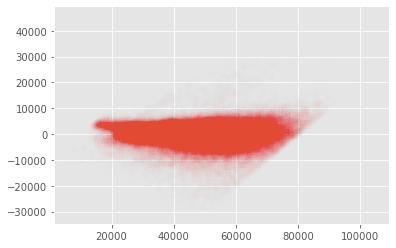

In [95]:
plt.scatter(y_predict,residuals, alpha=0.005);

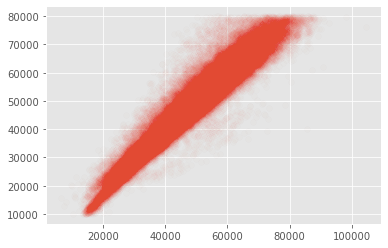

In [96]:
plt.scatter(y_predict,y,alpha=0.01)

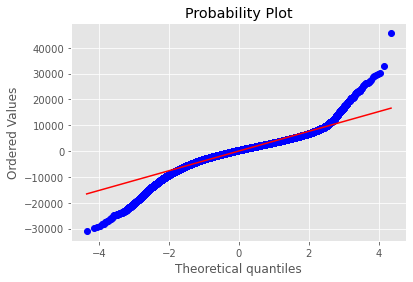

In [97]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [98]:
new_df = gm_df[gm_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

In [99]:
# x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','redWardkills','redWardPlaced','gameDuraton','blueKills','redKills']].values)
x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','gameDuraton','blueKills']].values)
# x = x[0:1000]

In [100]:
y = new_df['blueTotalGold']
# y = y[0:1000]

In [101]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.969e+05
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:16:15   Log-Likelihood:            -6.1503e+05
No. Observations:               63512   AIC:                         1.230e+06
Df Residuals:                   63507   BIC:                         1.230e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1643.2626     70.509     23.306      0.0

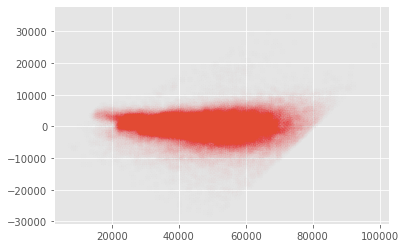

In [102]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
plt.scatter(y_predict,residuals, alpha=0.005);

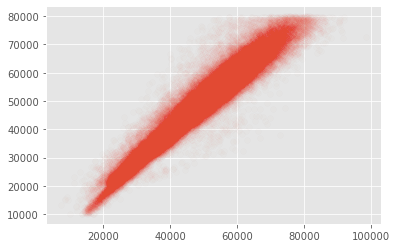

In [103]:
plt.scatter(y_predict,y,alpha=0.01);

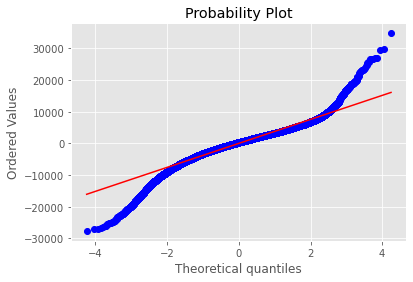

In [104]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [144]:
new_df = chall_df[chall_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

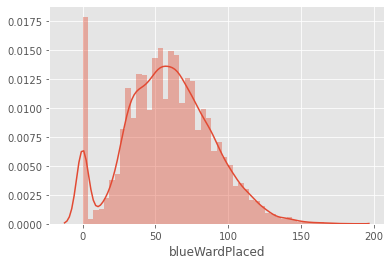

In [110]:
sns.distplot(new_df['blueWardPlaced']);

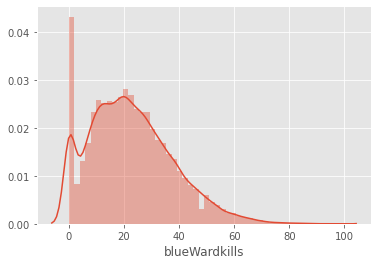

In [114]:
sns.distplot(new_df['blueWardkills']);

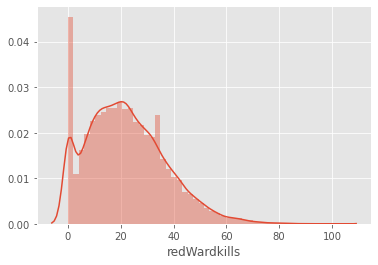

In [115]:
sns.distplot(new_df['redWardkills']);

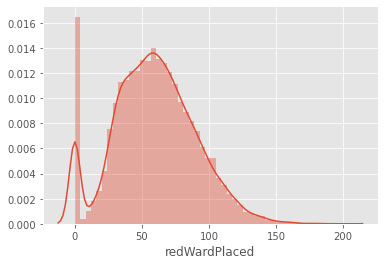

In [117]:
sns.distplot(new_df['redWardPlaced']);

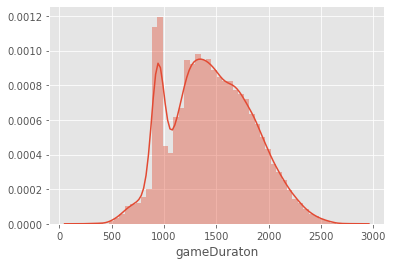

In [118]:
sns.distplot(new_df['gameDuraton']);

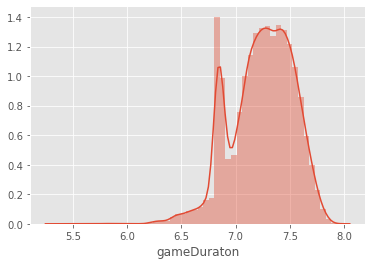

In [121]:
sns.distplot(np.log(new_df['gameDuraton']));

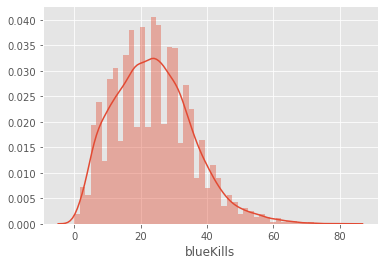

In [125]:
sns.distplot(new_df['blueKills']);

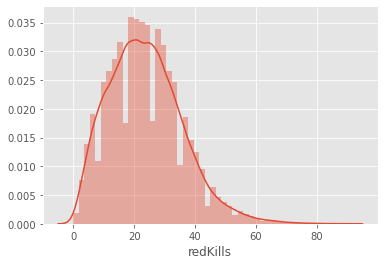

In [128]:
sns.distplot(new_df['redKills']);

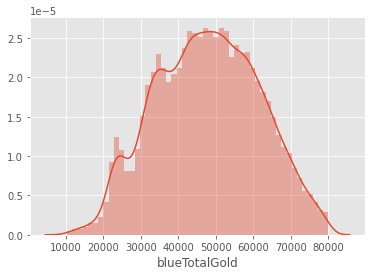

In [129]:
sns.distplot(new_df['blueTotalGold']);

In [170]:


columns = ['blueWardPlaced','blueKills','blueTotalHeal','blueObjectDamageDealt']
x = sm.tools.tools.add_constant(new_df[columns].values)
# x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','gameDuraton','blueKills']].values)
# x = x[0:1000]
y = new_df['blueTotalGold']
# y = y[0:1000]
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 4.392e+04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:52   Log-Likelihood:            -2.5819e+05
No. Observations:               26014   AIC:                         5.164e+05
Df Residuals:                   26009   BIC:                         5.164e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.489e+04     89.992    165.473      0.0

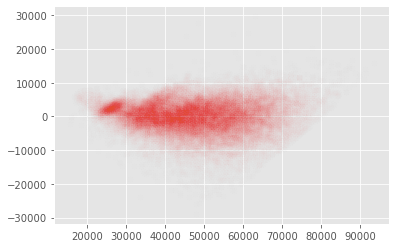

In [171]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
plt.scatter(y_predict,residuals, alpha=0.005);

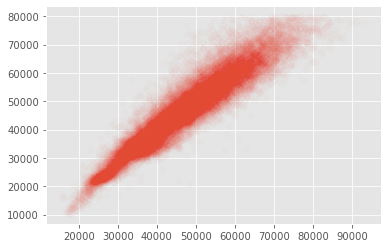

In [172]:
plt.scatter(y_predict,y,alpha=0.01);

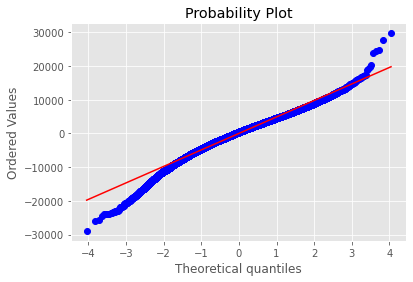

In [173]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [174]:
x = new_df[columns]

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 

p_values = pd.DataFrame(results.pvalues)
vif_data["p_values"] = p_values.values[1:]
# p_values.values[1:]
  
vif_data.head()

,feature,VIF,p_values
0,blueWardPlaced,7.041618,0.000000e+00
1,blueKills,5.426002,0.000000e+00
2,blueTotalHeal,8.031622,0.000000e+00
3,blueObjectDamageDealt,7.095036,2.269616e-18
